In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import joblib
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import cross_val_score,KFold

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet,LinearRegression,SGDRegressor,LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading train data from csv file
df_train= pd.read_excel('Data_Train.xlsx')

# reading test data from csv file
df_test= pd.read_excel('Test_set.xlsx')

# sample of train data
print('\x1b[1;31m'+'Train data sample'+'\x1b[0m')
df_train.head(3)

Train data sample


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [3]:
# sample of test data
print('\x1b[1;31m'+'Test data sample'+'\x1b[0m')
df_test.head(3)

Test data sample


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included


###### Performing EDA and data preprocessing

In [4]:
# checking shape of train and test data
print('\x1b[1;31m'+'Train data shape'+'\x1b[0m',df_train.shape)
print('\x1b[1;31m'+'Test data shape'+'\x1b[0m',df_test.shape)

Train data shape (10683, 11)
Test data shape (2671, 10)


In [5]:
# checking data type of train and test data
print('\x1b[1;31m'+'Data type of train data set\n\n'+'\x1b[0m',df_train.dtypes,'\n\n')
print('\x1b[1;31m'+'Data type of test data set\n'+'\x1b[0m',df_test.dtypes)

Data type of train data set

 Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object 


Data type of test data set
 Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object


In [6]:
#checking unique values in train and test data
print('\x1b[1;31m'+'Unique value in train data set\n\n'+'\x1b[0m',df_train.nunique(),'\n\n')
print('\x1b[1;31m'+'Unique value in test data set\n'+'\x1b[0m',df_test.nunique())

Unique value in train data set

 Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64 


Unique value in test data set
 Airline             11
Date_of_Journey     44
Source               5
Destination          6
Route              100
Dep_Time           199
Arrival_Time       704
Duration           320
Total_Stops          5
Additional_Info      6
dtype: int64


In [7]:
# replacing all '?' values with nan values in train and test data
df_train = df_train.replace('?', np.nan)
df_test = df_test.replace('?', np.nan)

In [8]:
# checking null value in train and test data
print('\x1b[1;31m'+'Null value in train data set\n\n'+'\x1b[0m',df_train.isnull().sum(),'\n\n')
print('\x1b[1;31m'+'Null value in test data set\n'+'\x1b[0m',df_test.isnull().sum())

Null value in train data set

 Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64 


Null value in test data set
 Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


Heat map of null value in train data set




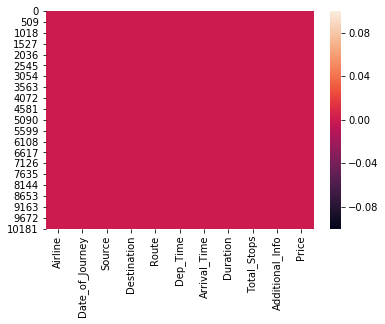

In [9]:
# heatmap of null value in train and test data
df_train.dropna(inplace=True)
print('\x1b[1;31m'+'Heat map of null value in train data set\n\n'+'\x1b[0m')
sns.heatmap(df_train.isnull())

Heat map of null value in test data set



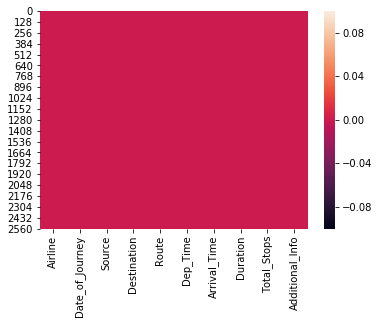

In [10]:
print('\x1b[1;31m'+'Heat map of null value in test data set\n'+'\x1b[0m')
sns.heatmap(df_test.isnull())

In [11]:
# checking shape of train and test data after removing null values
df_train.dropna(inplace=True)
print('\x1b[1;31m'+'Train data shape'+'\x1b[0m',df_train.shape)
print('\x1b[1;31m'+'Test data shape'+'\x1b[0m',df_test.shape)

Train data shape (10682, 11)
Test data shape (2671, 10)


In [12]:
#format date of journey into day of travel, month of travel, year of travel
#add extra column week day-- 1 mean week day 0 mean weekend

df_train['Day_of_Travel']=pd.to_datetime(df_train.Date_of_Journey,format="%d/%m/%Y").dt.day
df_test['Day_of_Travel']=pd.to_datetime(df_test.Date_of_Journey,format="%d/%m/%Y").dt.day

df_train['Month_of_Travel']=pd.to_datetime(df_train.Date_of_Journey,format="%d/%m/%Y").dt.month
df_test['Month_of_Travel']=pd.to_datetime(df_test.Date_of_Journey,format="%d/%m/%Y").dt.month

df_train['Weekday'] = ((pd.DatetimeIndex(df_train.Date_of_Journey).dayofweek) // 5 == 1).astype(int)
df_test['Weekday'] = ((pd.DatetimeIndex(df_test.Date_of_Journey).dayofweek) // 5 == 1).astype(int)

df_train=df_train.drop(columns=['Date_of_Journey'])
df_test=df_test.drop(columns=['Date_of_Journey'])

print('\x1b[1;31m'+'Train data sample'+'\x1b[0m')
df_train.head(3)

Train data sample


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Travel,Month_of_Travel,Weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,0


In [13]:
print('\x1b[1;31m'+'Test data sample'+'\x1b[0m')
df_test.head(3)

Test data sample


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day_of_Travel,Month_of_Travel,Weekday
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,0
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,0


In [14]:
#format journey time arrival and departure

#departure
df_train['Depart_Hour']=pd.to_datetime(df_train.Dep_Time).dt.hour
df_train['Depart_Minute']=pd.to_datetime(df_train.Dep_Time).dt.minute

df_test['Depart_Hour']=pd.to_datetime(df_test.Dep_Time).dt.hour
df_test['Depart_Minute']=pd.to_datetime(df_test.Dep_Time).dt.minute

#arrival
df_train['Arrival_Hour']=pd.to_datetime(df_train.Arrival_Time).dt.hour
df_train['Arrival_Minute']=pd.to_datetime(df_train.Arrival_Time).dt.minute

df_test['Arrival_Hour']=pd.to_datetime(df_test.Arrival_Time).dt.hour
df_test['Arrival_Minute']=pd.to_datetime(df_test.Arrival_Time).dt.minute

#dropping Dep_Time and Arrival_Time
df_train=df_train.drop(columns=['Dep_Time'])
df_test=df_test.drop(columns=['Dep_Time'])

df_train=df_train.drop(columns=['Arrival_Time'])
df_test=df_test.drop(columns=['Arrival_Time'])

print('\x1b[1;31m'+'Train data sample'+'\x1b[0m')
df_train.head(3)

Train data sample


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Travel,Month_of_Travel,Weekday,Depart_Hour,Depart_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,0,9,25,4,25


In [15]:
print('\x1b[1;31m'+'Test data sample'+'\x1b[0m')
df_test.head(3)

Test data sample


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day_of_Travel,Month_of_Travel,Weekday,Depart_Hour,Depart_Minute,Arrival_Hour,Arrival_Minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,0,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,0,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,0,19,15,19,0


In [16]:
#add extra two column wheter journey at night time or morning time

#we have seen some flights have less fare atmorning and high price at late night so direct relation

df_train['Night_Journey']=(df_train['Depart_Hour']>=20).astype(int)
df_train['Morning_Journey']=((df_train['Depart_Hour']>=4) & (df_train['Depart_Hour']<11)).astype(int)
df_train['Noon_Journey']=((df_train['Depart_Hour']>=11) & (df_train['Depart_Hour']<17)).astype(int)
df_train['Evening_Journey']=((df_train['Depart_Hour']>=17) & (df_train['Depart_Hour']<=20)).astype(int)

df_test['Night_Journey']=(df_test['Depart_Hour']>=20).astype(int)
df_test['Morning_Journey']=((df_test['Depart_Hour']>=4) & (df_train['Depart_Hour']<=8)).astype(int)
df_test['Noon_Journey']=((df_test['Depart_Hour']>=11) & (df_train['Depart_Hour']<17)).astype(int)
df_test['Evening_Journey']=((df_test['Depart_Hour']>=17) & (df_train['Depart_Hour']<=20)).astype(int)

print('\x1b[1;31m'+'Train data sample'+'\x1b[0m')
df_train.head(3)

Train data sample


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Travel,Month_of_Travel,Weekday,Depart_Hour,Depart_Minute,Arrival_Hour,Arrival_Minute,Night_Journey,Morning_Journey,Noon_Journey,Evening_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,22,20,1,10,1,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,1,5,50,13,15,0,1,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,0,9,25,4,25,0,1,0,0


In [17]:
print('\x1b[1;31m'+'Test data sample'+'\x1b[0m')
df_test.head(3)

Test data sample


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day_of_Travel,Month_of_Travel,Weekday,Depart_Hour,Depart_Minute,Arrival_Hour,Arrival_Minute,Night_Journey,Morning_Journey,Noon_Journey,Evening_Journey
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,0,17,30,4,25,0,0,0,0
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,0,6,20,10,20,0,1,0,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,0,19,15,19,0,0,0,1,1


In [18]:
#converting duration hour and minute into seprate columns
def extract_hour_minute(duration):
    hour=[]
    minute=[]

    for time in duration:
        minu=time.split(' ')
        count=len(minu)
        if count==2:
            h=minu[0].split('h')[0]
            hour.append(int(h))
            m=minu[1].split('m')[0]
            minute.append(int(m))
        elif minu[0][-1]=='m':
            hour.append(0)
            m=minu[0].split('m')[0]
            minute.append(int(m))
           #print(m)    
        elif minu[0][-1]=='h':
            minute.append(0)
            h=minu[0].split('h')[0]
            hour.append(int(h))
           #print(h)
    return hour,minute

In [19]:
#lets call function and add to new columns

df_train['Travel_Hour'],df_train['Travel_Minute']=extract_hour_minute(df_train['Duration'])
df_test['Travel_Hour'],df_test['Travel_Minute']=extract_hour_minute(df_test['Duration'])

df_train=df_train.drop(columns=['Duration'])
df_test=df_test.drop(columns=['Duration'])

print('\x1b[1;31m'+'Train data sample'+'\x1b[0m')
df_train.head(3)

Train data sample


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Travel,Month_of_Travel,Weekday,Depart_Hour,Depart_Minute,Arrival_Hour,Arrival_Minute,Night_Journey,Morning_Journey,Noon_Journey,Evening_Journey,Travel_Hour,Travel_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,22,20,1,10,1,0,0,0,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,1,5,50,13,15,0,1,0,0,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,0,9,25,4,25,0,1,0,0,19,0


In [20]:
df_test.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Day_of_Travel,Month_of_Travel,Weekday,Depart_Hour,Depart_Minute,Arrival_Hour,Arrival_Minute,Night_Journey,Morning_Journey,Noon_Journey,Evening_Journey,Travel_Hour,Travel_Minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,0,17,30,4,25,0,0,0,0,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,0,6,20,10,20,0,1,0,0,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,0,19,15,19,0,0,0,1,1,23,45


In [21]:
df_train.describe()

,Price,Day_of_Travel,Month_of_Travel,Weekday,Depart_Hour,Depart_Minute,Arrival_Hour,Arrival_Minute,Night_Journey,Morning_Journey,Noon_Journey,Evening_Journey,Travel_Hour,Travel_Minute
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,9087.214567,13.509081,4.708575,0.212039,12.491013,24.409287,13.349186,24.690601,0.158304,0.421363,0.233009,0.220652,10.244898,28.326624
std,4611.548810,8.479363,1.164408,0.408771,5.748820,18.767801,6.859317,16.506808,0.365043,0.493801,0.422768,0.414705,8.494916,16.945817
min,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,6.000000,3.000000,0.000000,8.000000,5.000000,8.000000,10.000000,0.000000,0.000000,0.000000,0.000000,2.000000,15.000000
50%,8372.000000,12.000000,5.000000,0.000000,11.000000,25.000000,14.000000,25.000000,0.000000,0.000000,0.000000,0.000000,8.000000,30.000000
75%,12373.000000,21.000000,6.000000,0.000000,18.000000,40.000000,19.000000,35.000000,0.000000,1.000000,0.000000,0.000000,15.000000,45.000000
max,79512.000000,27.000000,6.000000,1.000000,23.000000,55.000000,23.000000,55.000000,1.000000,1.000000,1.000000,1.000000,47.000000,55.000000


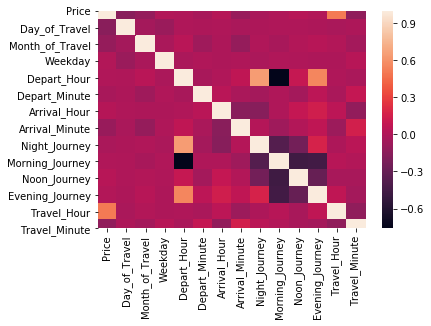

In [22]:
# heat map of corelation
sns.heatmap(df_train.corr())

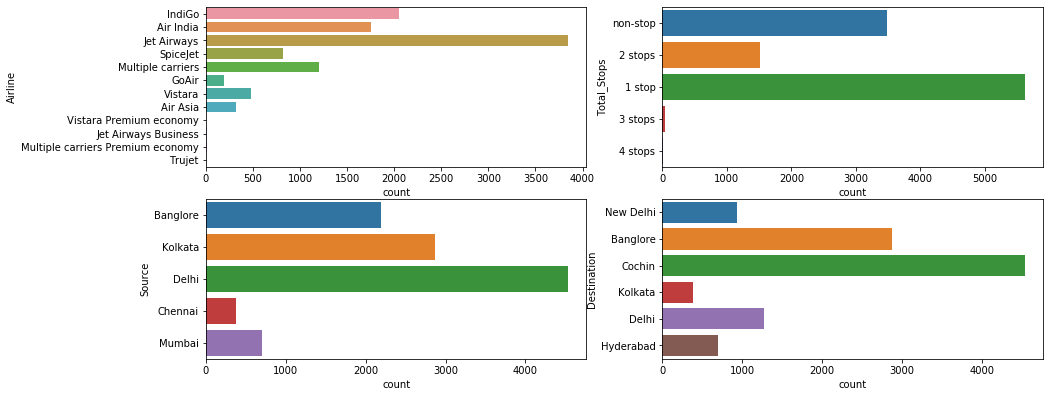

In [23]:
#creating barplot of colums to check the count of indivisual value
Index=df_train[['Airline','Total_Stops','Source','Destination']]
figure(num=None,figsize=(15,10))
for column_index,col in enumerate(Index.columns):
    plt.subplot(3,2,column_index+1)
    sns.countplot(y=Index[col],data=Index)

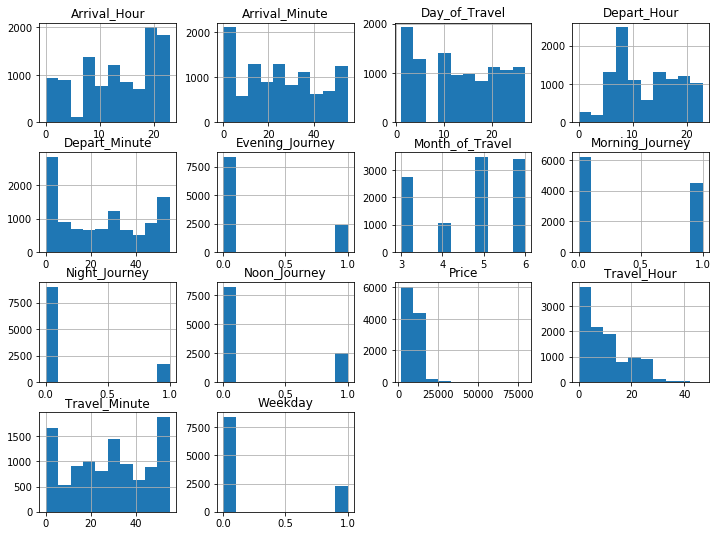

In [24]:
#histogram to check the data despersion

df_train.hist(figsize=(12,9))
plt.show()

Price                 AxesSubplot(0.125,0.772143;0.227941x0.107857)
Day_of_Travel      AxesSubplot(0.398529,0.772143;0.227941x0.107857)
Month_of_Travel    AxesSubplot(0.672059,0.772143;0.227941x0.107857)
Weekday               AxesSubplot(0.125,0.642714;0.227941x0.107857)
Depart_Hour        AxesSubplot(0.398529,0.642714;0.227941x0.107857)
Depart_Minute      AxesSubplot(0.672059,0.642714;0.227941x0.107857)
Arrival_Hour          AxesSubplot(0.125,0.513286;0.227941x0.107857)
Arrival_Minute     AxesSubplot(0.398529,0.513286;0.227941x0.107857)
Night_Journey      AxesSubplot(0.672059,0.513286;0.227941x0.107857)
Morning_Journey       AxesSubplot(0.125,0.383857;0.227941x0.107857)
Noon_Journey       AxesSubplot(0.398529,0.383857;0.227941x0.107857)
Evening_Journey    AxesSubplot(0.672059,0.383857;0.227941x0.107857)
Travel_Hour           AxesSubplot(0.125,0.254429;0.227941x0.107857)
Travel_Minute      AxesSubplot(0.398529,0.254429;0.227941x0.107857)
dtype: object

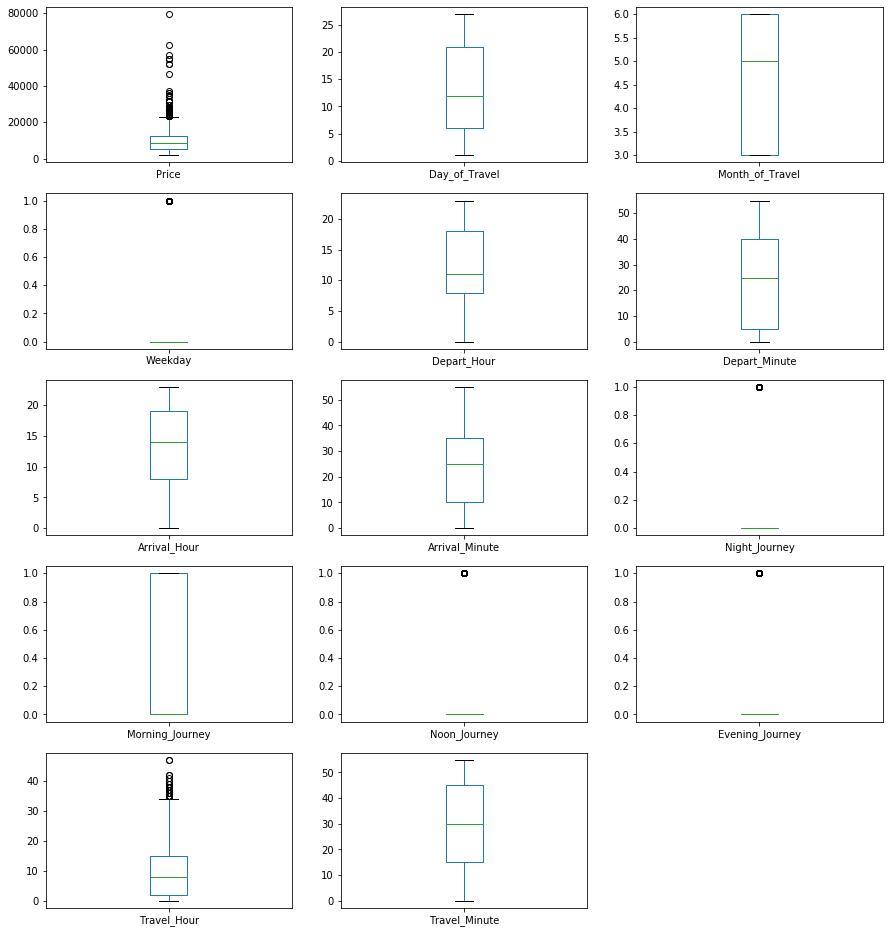

In [25]:
# Creating boxplot of continous variables to visualize the minimum, maximum, avareg value for each colums along with outlires
df_train.plot(kind='box',subplots=True,layout=(6,3),figsize=(15,20))

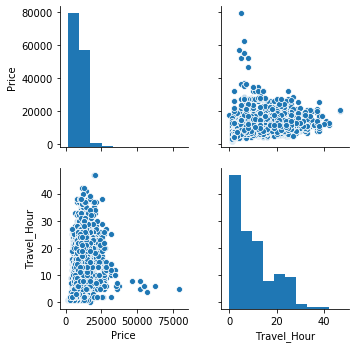

In [26]:
#check the price and travel hour pair plot
sns.pairplot(data=df_train,vars=['Price','Travel_Hour'])

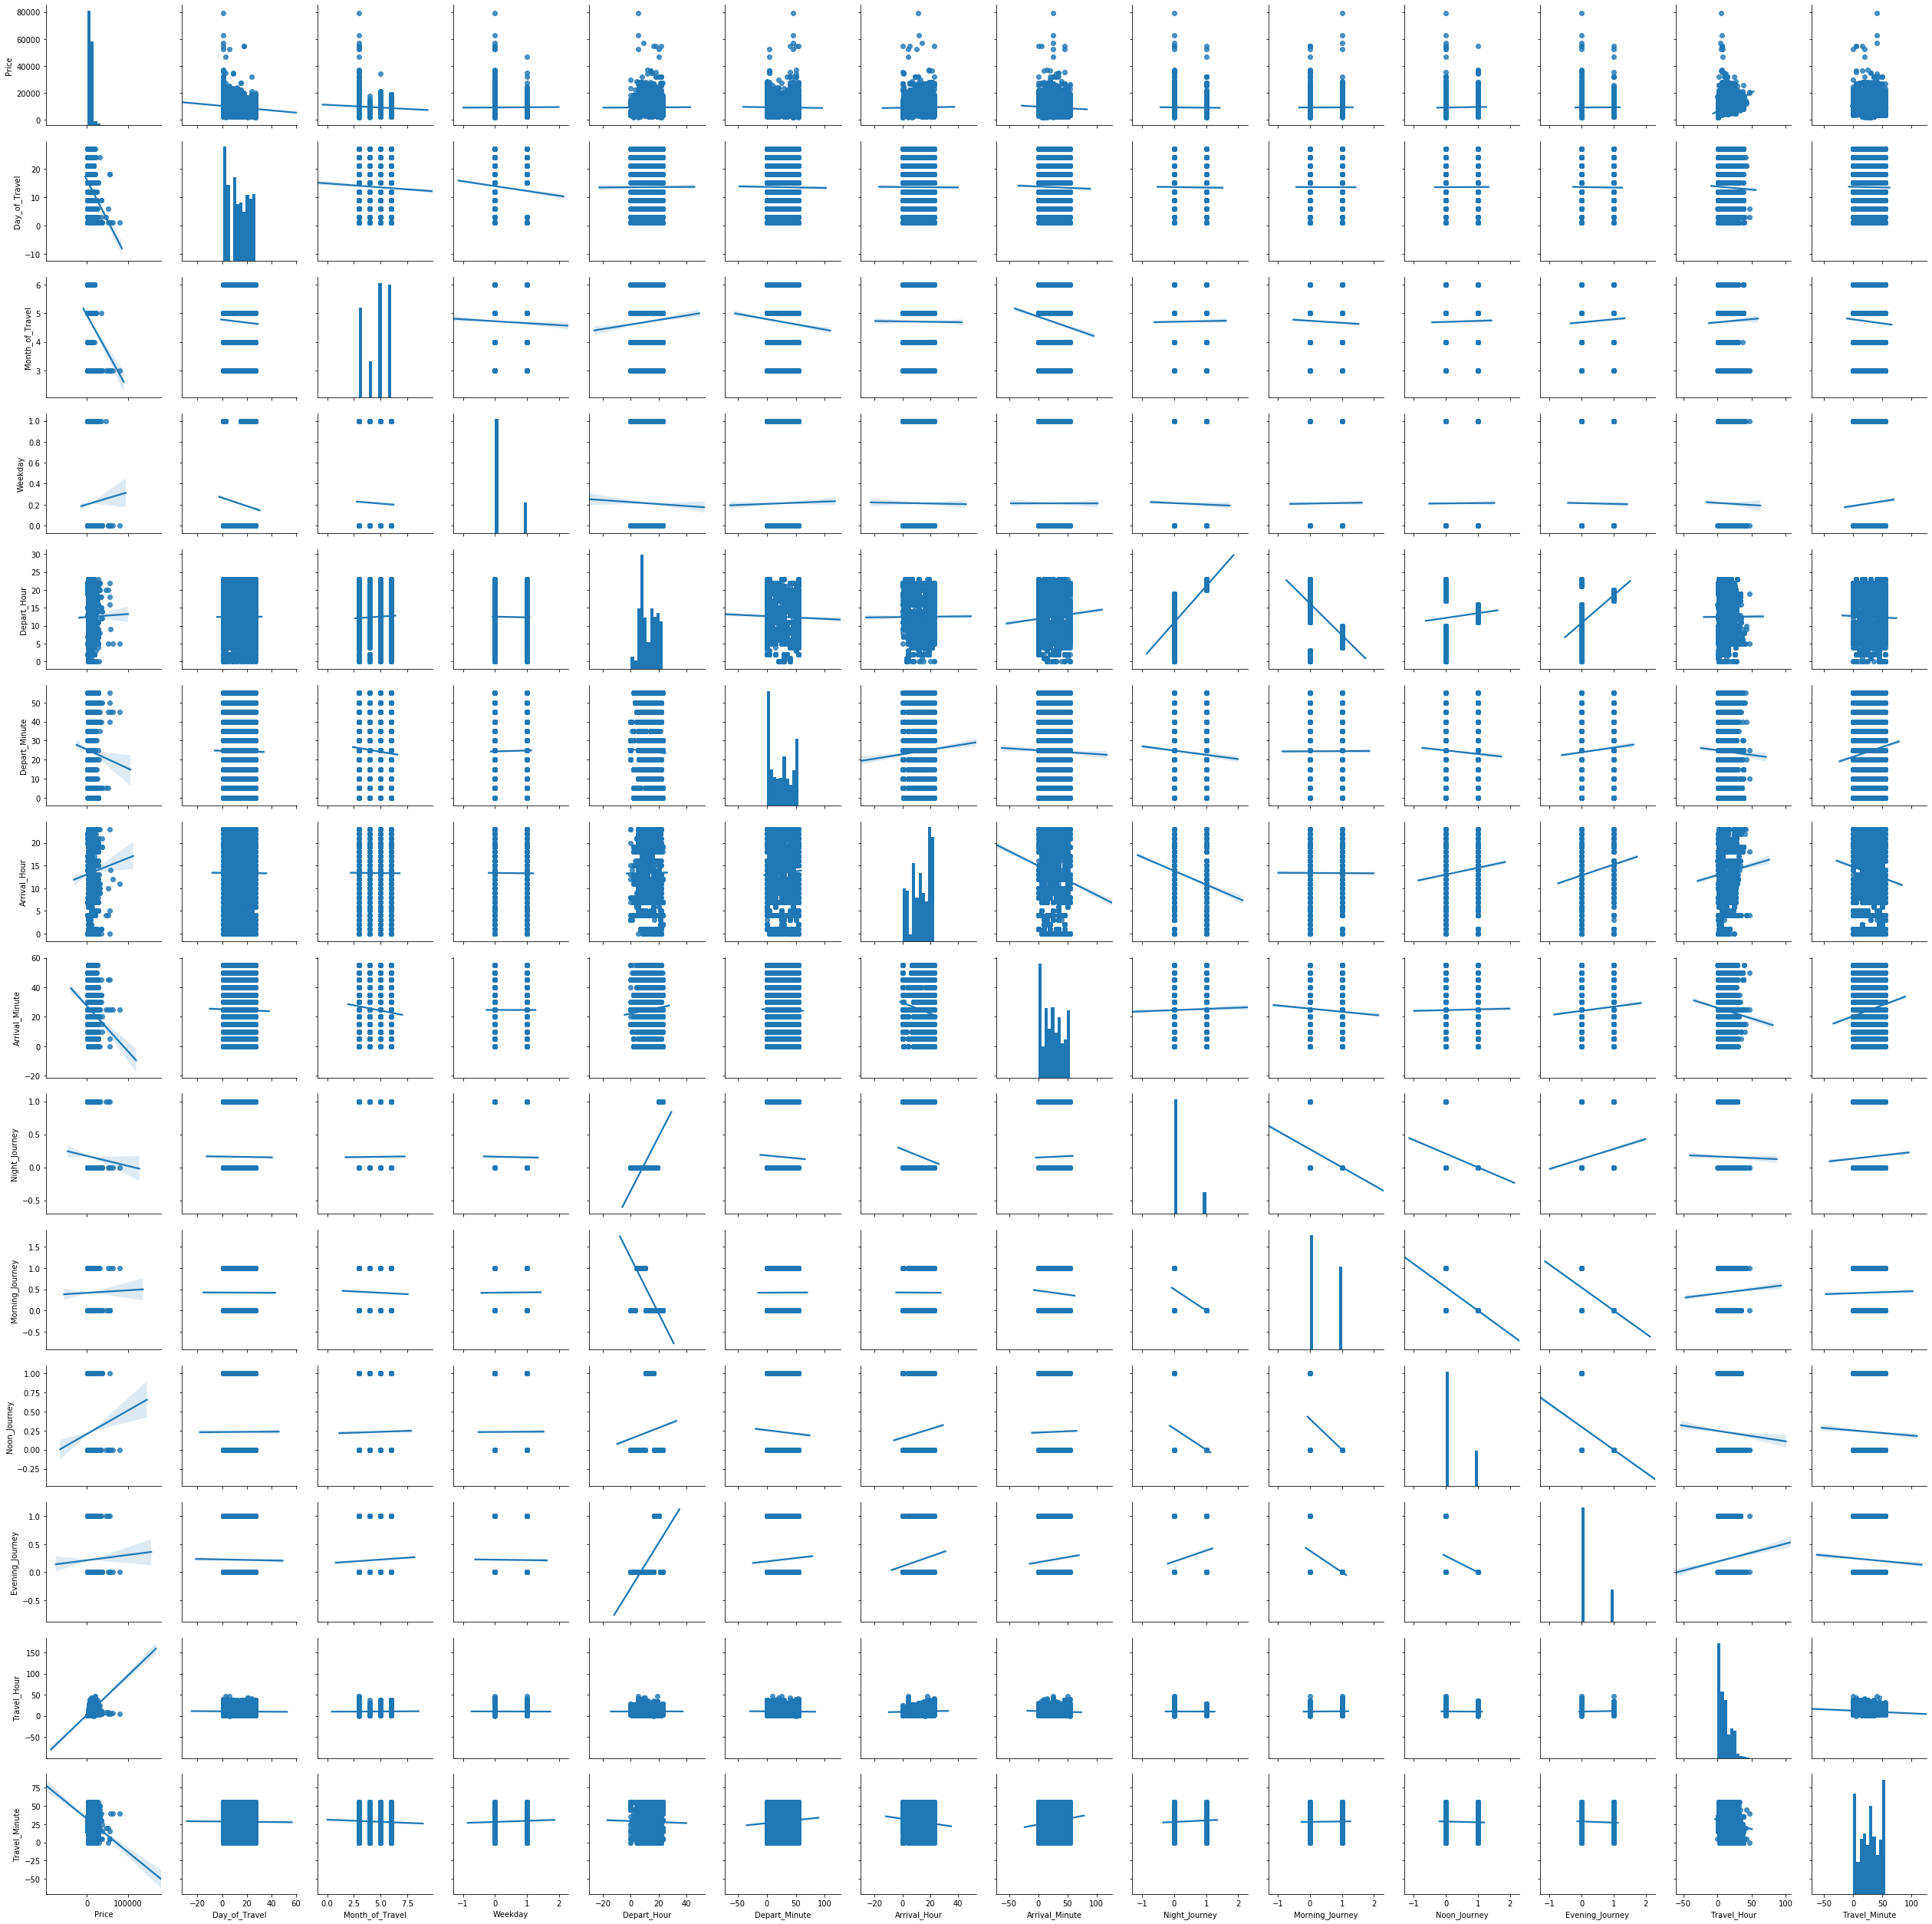

In [27]:
sns.pairplot(data=df_train,kind='reg')

Text(0.5, 1.0, 'Price')

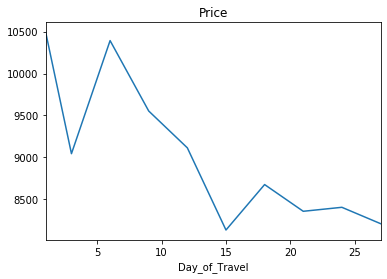

In [28]:
#fluctuation in price over the day of traval
byDate=df_train.groupby('Day_of_Travel').mean()
byDate['Price'].plot()
plt.title('Price')

Text(0.5, 1.0, 'Price')

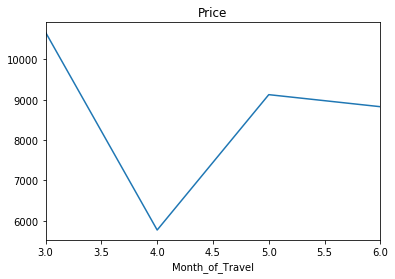

In [29]:
#fluctuation in price over the month of traval
byDate=df_train.groupby('Month_of_Travel').mean()
byDate['Price'].plot()
plt.title('Price')

###### Manipulating data before bulding the model

In [30]:
#removing outlires 
count=df_train[['Price']]
z=abs(zscore(count))
print(df_train.shape)
df_train=df_train.loc[(z<3).all(axis=1)]
print(df_train.shape)

(10682, 20)
(10586, 20)


In [31]:
#lets check any flight who's total traval time is leass tan 1 hour
df_train[((df_train['Travel_Minute']<50) & (df_train['Travel_Hour']==0))]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Travel,Month_of_Travel,Weekday,Depart_Hour,Depart_Minute,Arrival_Hour,Arrival_Minute,Night_Journey,Morning_Journey,Noon_Journey,Evening_Journey,Travel_Hour,Travel_Minute
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,2 stops,No info,17327,6,3,0,16,50,16,55,0,0,1,0,0,5


we have found one record which is from Mumbai to Hyderabad in five minutes only since it is quite impossible we will remove this entry

In [32]:
df_train=df_train[~((df_train['Travel_Minute']<50) & (df_train['Travel_Hour']==0))]

In [33]:
df_train.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Travel,Month_of_Travel,Weekday,Depart_Hour,Depart_Minute,Arrival_Hour,Arrival_Minute,Night_Journey,Morning_Journey,Noon_Journey,Evening_Journey,Travel_Hour,Travel_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,22,20,1,10,1,0,0,0,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,1,5,50,13,15,0,1,0,0,7,25


In [34]:
#get dummies of source and destination city
df_train=pd.get_dummies(df_train, columns=['Source', 'Destination'])
df_train.head(3)

,Airline,Route,Total_Stops,Additional_Info,Price,Day_of_Travel,Month_of_Travel,Weekday,Depart_Hour,Depart_Minute,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,BLR → DEL,non-stop,No info,3897,24,3,1,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,1,5,50,...,0,0,1,0,1,0,0,0,0,0
2,Jet Airways,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,0,9,25,...,0,1,0,0,0,1,0,0,0,0


In [35]:
#get dummies of source and destination city
df_test=pd.get_dummies(df_test, columns=['Source', 'Destination'])
df_test.head(3)

,Airline,Route,Total_Stops,Additional_Info,Day_of_Travel,Month_of_Travel,Weekday,Depart_Hour,Depart_Minute,Arrival_Hour,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,DEL → BOM → COK,1 stop,No info,6,6,0,17,30,4,...,0,1,0,0,0,1,0,0,0,0
1,IndiGo,CCU → MAA → BLR,1 stop,No info,12,5,0,6,20,10,...,0,0,1,0,1,0,0,0,0,0
2,Jet Airways,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,0,19,15,19,...,0,1,0,0,0,1,0,0,0,0


In [36]:
#masking of object column
categorial_mask1=df_train.dtypes==object
categorial_mask2=df_test.dtypes==object

#categorical columns
categorical_cols1=df_train.columns[categorial_mask1].tolist()
categorical_cols2=df_test.columns[categorial_mask2].tolist()

le=LabelEncoder()

df_train[categorical_cols1]=df_train[categorical_cols1].apply(lambda col:le.fit_transform(col))
df_test[categorical_cols2]=df_test[categorical_cols2].apply(lambda col:le.fit_transform(col))

df_train.head(3)

,Airline,Route,Total_Stops,Additional_Info,Price,Day_of_Travel,Month_of_Travel,Weekday,Depart_Hour,Depart_Minute,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3,18,4,5,3897,24,3,1,22,20,...,0,0,0,0,0,0,0,0,0,1
1,1,81,1,5,7662,1,5,1,5,50,...,0,0,1,0,1,0,0,0,0,0
2,4,115,1,5,13882,9,6,0,9,25,...,0,1,0,0,0,1,0,0,0,0


In [37]:
df_test.head(3)

,Airline,Route,Total_Stops,Additional_Info,Day_of_Travel,Month_of_Travel,Weekday,Depart_Hour,Depart_Minute,Arrival_Hour,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,4,76,0,5,6,6,0,17,30,4,...,0,1,0,0,0,1,0,0,0,0
1,3,65,0,5,12,5,0,6,20,10,...,0,0,1,0,1,0,0,0,0,0
2,4,76,0,3,21,5,0,19,15,19,...,0,1,0,0,0,1,0,0,0,0


In [38]:
# dividing dataset into input values 'x' and output value 'y'
x = df_train.drop(columns=['Price'])
print('x dataset\n',x.head(),'\n')
y=df_train['Price']
print('y datase\n',y.sample(3))
print(x.shape)
print(y.shape)

x dataset
    Airline  Route  Total_Stops  Additional_Info  Day_of_Travel  \
0        3     18            4                5             24   
1        1     81            1                5              1   
2        4    115            1                5              9   
3        3     88            0                5             12   
4        3     29            0                5              1   

   Month_of_Travel  Weekday  Depart_Hour  Depart_Minute  Arrival_Hour  ...  \
0                3        1           22             20             1  ...   
1                5        1            5             50            13  ...   
2                6        0            9             25             4  ...   
3                5        0           18              5            23  ...   
4                3        0           16             50            21  ...   

   Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
0               0             0               0          

In [39]:
# standardizes the data in x using standerd scaler technique
scale=StandardScaler()
x=scale.fit_transform(x)

###### Bulding and comparing multipe regression model, to find out the best model

In [40]:
#creating models array with all the model
Models=[('Ridge',Ridge()),('GradientBoostingRegressor',GradientBoostingRegressor(random_state=5)),('ElasticNet',ElasticNet()),
        ('Lasso',Lasso(random_state=29)),('SGDRegressor',SGDRegressor()),('DecisionTreeRegressor',DecisionTreeRegressor(random_state=5)),
        ('KNeighborsRegressor',KNeighborsRegressor()),('RandomForestRegressor',RandomForestRegressor(random_state=5)),
        ('LinearRegression',LinearRegression()),('SVR',SVR())]

In [41]:
# loop to find out the maximum r2score for all the model in models array, along a range of random state
Model_array=[]
Random_state=[]
Max_r2score_array=[]
for name,model in Models:
    max_r2score=0    
    for random_state in range(10,99):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.2,random_state=random_state,shuffle=True)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
        
        r2score=r2_score(test_y,pred)
        
        if r2score>max_r2score:
            max_r2score=r2score
            best_random_state=random_state
    
    Model_array.append(name)
    Random_state.append(best_random_state)
    Max_r2score_array.append(max_r2score)

In [42]:
# comparing the performances of all the model on R2 score basis
model_accuracy_performance = pd.DataFrame({'Model': Model_array,'R2 score': Max_r2score_array,'Random state': Random_state})
model_accuracy_performance.sort_values(by='R2 score', ascending=False)

,Model,R2 score,Random state
7,RandomForestRegressor,0.930786,48
5,DecisionTreeRegressor,0.894061,36
1,GradientBoostingRegressor,0.854432,54
6,KNeighborsRegressor,0.778810,56
0,Ridge,0.521711,29
3,Lasso,0.521635,29
8,LinearRegression,0.521595,29
4,SGDRegressor,0.519688,54
2,ElasticNet,0.489262,54
9,SVR,0.061008,43


###### Conclusion
On basis of r2 score RandomForestRegressor model is performing the best with maximum r2 score

In [43]:
# loop to find out the cross_val_score for r2 of all the model in models array
Cross_val_score_array=[]
Standard_Deviation=[]
for name, model in Models:
    kf=KFold(n_splits=10,random_state=5)
    cscore=cross_val_score(model,x,y,cv=kf,scoring='r2')
    
    Cross_val_score_array.append(cscore.mean())
    Standard_Deviation.append(cscore.std())

In [44]:
# comparing the performances of all the model on crossval basis
model_cross_val_performance = pd.DataFrame({'Model': Model_array,'Cross val Acuracy': Cross_val_score_array,
                                            'Standard Deviation': Standard_Deviation})
model_cross_val_performance.sort_values(by='Cross val Acuracy', ascending=False)

,Model,Cross val Acuracy,Standard Deviation
7,RandomForestRegressor,0.920610,0.007056
5,DecisionTreeRegressor,0.882687,0.017111
1,GradientBoostingRegressor,0.837504,0.007489
6,KNeighborsRegressor,0.768928,0.011592
3,Lasso,0.497708,0.023373
0,Ridge,0.497695,0.023562
8,LinearRegression,0.497654,0.023631
4,SGDRegressor,0.496322,0.023221
2,ElasticNet,0.463200,0.015402
9,SVR,0.051012,0.011219


###### Conclusion
On basis of Cross val Acuracy RandomForestRegressor model is performing best with maximum cross val score

###### On basis of our compression of r2  and Cross val score i choose RandomForestRegressor model since it performing best on given data

In [45]:
#using grid search to improve result for GradientBoostingRegressor model
kfoldr =KFold(n_splits=10,random_state=5)
param_grid={'max_depth':[13,14,15],'max_features':['auto','sqrt'],'min_samples_split':[4,5,6],
            'n_estimators':[200,300,400],'min_samples_leaf':[2,3,4]}
mod=RandomForestRegressor()
grid=GridSearchCV(estimator=mod,param_grid=param_grid,scoring='r2',cv=kfoldr,n_jobs=3)
grid_result=grid.fit(x,y)

In [46]:
grid_result.best_score_

0.9294996357364665

In [47]:
grid_result.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 300}

In [48]:
grid_result.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

### Using test data and predecting price for test data...

In [49]:
X_train = df_train.drop(labels='Price', axis=1)
y_train = df_train['Price'].values

X_test = df_test

In [50]:
# standardizes the data in x using standerd scaler technique
X_train=scale.fit_transform(X_train)
X_test=scale.fit_transform(X_test)

In [51]:
#checking shape of train and test data
X_train.shape,y_train.shape,X_test.shape

((10585, 28), (10585,), (2671, 28))

In [53]:
# using best performing model for predecting the price
rfr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

rfr.fit(X_train,y_train)

Y_pred = rfr.predict(X_test)

In [54]:
# saving the predection to a csv file.
prediction = pd.DataFrame(Y_pred, columns=['Y_pred']).to_csv('Project 17 Predict The Flight Ticket Price.csv')

In [55]:
# saving the model using pickle.
joblib.dump(rfr,'rfr_Project 17 Predict The Flight Ticket Price.pkl')

['rfr_Project 17 Predict The Flight Ticket Price.pkl']